# Plotting ratios

395
./../data/spark-meters/training/000481.txt
./../data/spark-meters/training/000644d.txt


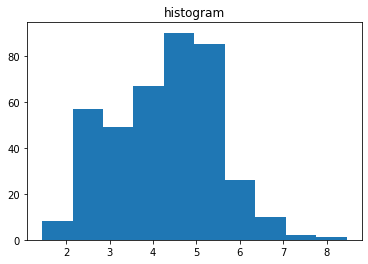

In [5]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from yolo_lib.annotation import *
from PIL import Image
import glob
import os
import numpy as np
from matplotlib import pyplot as plt 
from yolo_lib.annotation import *

folder = './../data/spark-meters/training'
txt_files = glob.glob( folder + "/*.txt")
#txt_files = txt_files[:10]
print(len(txt_files))

ratios = np.array([])
for filename in txt_files:

    # Read
    base = os.path.splitext(filename)[0]
    imageFilename = base  + '.jpg'
    
    annotations = Annotation.create_from_file(filename)
    
    im = Image.open(imageFilename)
    width, height = im.size
    
    if len(annotations) > 1 or len(annotations) < 1:
        print(filename)

    for annotation in annotations:
    
        abs_width = width*annotation.width
        abs_height = height*annotation.height
        
        ratio = abs_width/abs_height
        
        if ratio < 1.7:
            print(filename)
        ratios = np.append(ratios,ratio)
    
    
hist,bins = np.histogram(ratios) 

plt.hist(ratios) 
plt.title("histogram") 
plt.show()